## 케라스 기초 예제 돌려보기(MNIST)

In [30]:
# 케라스 기초 예제 돌려보기(MNIST)
import keras
from keras.datasets import mnist
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices()) # 현재 컴퓨터에서 사용 가능한 자원 출력. GPU를 사용하려면 CUDA와 cuDNN이 설치되어야 함 

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # mnist.load_data()는 4개의 아웃풋을 제공. 

train_images.shape 
print(len(train_labels), train_images.shape[0])


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15855152774177576835
]


60000 60000


## MNIST 학습해보기

[5 0 4 ... 5 6 8]


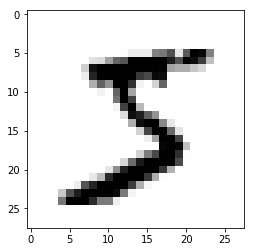

In [20]:
# MNIST train data 한장 출력해보기
import matplotlib.pyplot as plt

digit = train_images[0]
print(train_labels)
plt.imshow(digit, cmap=plt.cm.binary) # 'digit라는 matrix를 넣어 binary 이미지를 출력하겠다.'
plt.show()


In [21]:
# Keras로 간단한 이미지 분류 모델 만들기
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) # Dense : Dense는 Keras에서 fully-connected layer를 의미.
network.add(layers.Dense(10, activation='softmax')) # 뉴런 10개를 붙이고 softmax로 활성화

network.compile(optimizer='rmsprop',
                loss = 'categorical_crossentropy', # crossentropy는 확률분포를 서로 갖게 만든다는 개념. 
                metrics=['accuracy'])

# 학습 데이터 전처리
# error을 weight로 미분한 후 learning rate와 곱한 만큼 역전파를 하는데, 이때 고르게 에러를 갱신하려면 0~1 범위로 정규화해주어야 한다. 
train_images = train_images.reshape((60000, 28*28)) 
train_images = train_images.astype('float32') / 255 # 256으로 나눔.
test_images = test_images.reshape((10000, 28*28)) 
test_images = test_images.astype('float32') / 255 # 256으로 나눔.

In [22]:
from keras.utils import to_categorical

# 범주형 데이터로 변환
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape)

(60000, 10)


In [28]:
network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
  128/60000 [..............................] - ETA: 4s - loss: 0.0161 - acc: 0.9922

 1024/60000 [..............................] - ETA: 3s - loss: 0.0196 - acc: 0.9941

 1920/60000 [..............................] - ETA: 3s - loss: 0.0245 - acc: 0.9932

 3072/60000 [>.............................] - ETA: 3s - loss: 0.0214 - acc: 0.9941

 4096/60000 [=>............................] - ETA: 3s - loss: 0.0205 - acc: 0.9946

 5120/60000 [=>............................] - ETA: 3s - loss: 0.0204 - acc: 0.9941

 5760/60000 [=>............................] - ETA: 3s - loss: 0.0223 - acc: 0.9931

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.0218 - acc: 0.9933

 7296/60000 [==>...........................] - ETA: 3s - loss: 0.0213 - acc: 0.9936

 8320/60000 [===>..........................] - ETA: 3s - loss: 0.0222 - acc: 0.9931

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.0219 - acc: 0.9932

10624/60000 [====>.........................] - ETA: 2s - loss: 0.0227 - acc: 0.9929

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0226 - acc: 0.9925

12928/60000 [=====>........................] - ETA: 2s - loss: 0.0258 - acc: 0.9921

14080/60000 [======>.......................] - ETA: 2s - loss: 0.0261 - acc: 0.9920

15232/60000 [======>.......................] - ETA: 2s - loss: 0.0262 - acc: 0.9916

16256/60000 [=======>......................] - ETA: 2s - loss: 0.0271 - acc: 0.9912

17280/60000 [=======>......................] - ETA: 2s - loss: 0.0270 - acc: 0.9913

18304/60000 [========>.....................] - ETA: 2s - loss: 0.0267 - acc: 0.9914

19200/60000 [========>.....................] - ETA: 2s - loss: 0.0264 - acc: 0.9916

20224/60000 [=========>....................] - ETA: 2s - loss: 0.0260 - acc: 0.9917

21376/60000 [=========>....................] - ETA: 2s - loss: 0.0257 - acc: 0.9919

22400/60000 [==========>...................] - ETA: 2s - loss: 0.0260 - acc: 0.9918

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0266 - acc: 0.9918

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0264 - acc: 0.9919

25728/60000 [===========>..................] - ETA: 1s - loss: 0.0267 - acc: 0.9919

26752/60000 [============>.................] - ETA: 1s - loss: 0.0267 - acc: 0.9919

27776/60000 [============>.................] - ETA: 1s - loss: 0.0264 - acc: 0.9919

28672/60000 [=============>................] - ETA: 1s - loss: 0.0266 - acc: 0.9918

29824/60000 [=============>................] - ETA: 1s - loss: 0.0267 - acc: 0.9916

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0265 - acc: 0.9917

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0262 - acc: 0.9919

33024/60000 [===============>..............] - ETA: 1s - loss: 0.0260 - acc: 0.9920

34048/60000 [================>.............] - ETA: 1s - loss: 0.0258 - acc: 0.9920

35200/60000 [================>.............] - ETA: 1s - loss: 0.0258 - acc: 0.9919

36224/60000 [=================>............] - ETA: 1s - loss: 0.0266 - acc: 0.9917

37120/60000 [=================>............] - ETA: 1s - loss: 0.0266 - acc: 0.9917

38144/60000 [==================>...........] - ETA: 1s - loss: 0.0267 - acc: 0.9917

39168/60000 [==================>...........] - ETA: 1s - loss: 0.0265 - acc: 0.9917

40320/60000 [===================>..........] - ETA: 1s - loss: 0.0263 - acc: 0.9918

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0260 - acc: 0.9919

42368/60000 [====================>.........] - ETA: 0s - loss: 0.0265 - acc: 0.9918

43264/60000 [====================>.........] - ETA: 0s - loss: 0.0266 - acc: 0.9917

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0267 - acc: 0.9917

45440/60000 [=====================>........] - ETA: 0s - loss: 0.0271 - acc: 0.9915

46464/60000 [======================>.......] - ETA: 0s - loss: 0.0271 - acc: 0.9916

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0273 - acc: 0.9915

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0271 - acc: 0.9915

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0270 - acc: 0.9916

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0271 - acc: 0.9916

51840/60000 [========================>.....] - ETA: 0s - loss: 0.0272 - acc: 0.9915

52992/60000 [=========================>....] - ETA: 0s - loss: 0.0274 - acc: 0.9915

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0275 - acc: 0.9915

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0274 - acc: 0.9916

56192/60000 [===========================>..] - ETA: 0s - loss: 0.0274 - acc: 0.9916

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0276 - acc: 0.9916

58496/60000 [============================>.] - ETA: 0s - loss: 0.0276 - acc: 0.9916

59520/60000 [============================>.] - ETA: 0s - loss: 0.0275 - acc: 0.9916

60000/60000 [==============================] - 3s 51us/step - loss: 0.0275 - acc: 0.9916


Epoch 2/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0092 - acc: 1.0000

  896/60000 [..............................] - ETA: 3s - loss: 0.0154 - acc: 0.9955

 1920/60000 [..............................] - ETA: 3s - loss: 0.0175 - acc: 0.9953

 3072/60000 [>.............................] - ETA: 3s - loss: 0.0171 - acc: 0.9951

 4096/60000 [=>............................] - ETA: 3s - loss: 0.0202 - acc: 0.9937

 5120/60000 [=>............................] - ETA: 2s - loss: 0.0192 - acc: 0.9939

 6272/60000 [==>...........................] - ETA: 2s - loss: 0.0198 - acc: 0.9939

 7296/60000 [==>...........................] - ETA: 2s - loss: 0.0192 - acc: 0.9942

 8064/60000 [===>..........................] - ETA: 2s - loss: 0.0195 - acc: 0.9940

 9088/60000 [===>..........................] - ETA: 2s - loss: 0.0191 - acc: 0.9943

10112/60000 [====>.........................] - ETA: 2s - loss: 0.0184 - acc: 0.9946

11136/60000 [====>.........................] - ETA: 2s - loss: 0.0196 - acc: 0.9943

12160/60000 [=====>........................] - ETA: 2s - loss: 0.0208 - acc: 0.9940

13184/60000 [=====>........................] - ETA: 2s - loss: 0.0208 - acc: 0.9940

14080/60000 [======>.......................] - ETA: 2s - loss: 0.0205 - acc: 0.9940

14976/60000 [======>.......................] - ETA: 2s - loss: 0.0201 - acc: 0.9941

15872/60000 [======>.......................] - ETA: 2s - loss: 0.0201 - acc: 0.9941

16896/60000 [=======>......................] - ETA: 2s - loss: 0.0199 - acc: 0.9941

17920/60000 [=======>......................] - ETA: 2s - loss: 0.0197 - acc: 0.9941

19072/60000 [========>.....................] - ETA: 2s - loss: 0.0195 - acc: 0.9941

20224/60000 [=========>....................] - ETA: 2s - loss: 0.0195 - acc: 0.9942

21248/60000 [=========>....................] - ETA: 2s - loss: 0.0194 - acc: 0.9942

22400/60000 [==========>...................] - ETA: 1s - loss: 0.0197 - acc: 0.9942

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0207 - acc: 0.9938

24704/60000 [===========>..................] - ETA: 1s - loss: 0.0211 - acc: 0.9938

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0211 - acc: 0.9937

26880/60000 [============>.................] - ETA: 1s - loss: 0.0209 - acc: 0.9937

27904/60000 [============>.................] - ETA: 1s - loss: 0.0212 - acc: 0.9935

28928/60000 [=============>................] - ETA: 1s - loss: 0.0219 - acc: 0.9934

30080/60000 [==============>...............] - ETA: 1s - loss: 0.0216 - acc: 0.9935

31232/60000 [==============>...............] - ETA: 1s - loss: 0.0216 - acc: 0.9935

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0220 - acc: 0.9934

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0221 - acc: 0.9933

34432/60000 [================>.............] - ETA: 1s - loss: 0.0220 - acc: 0.9934

35456/60000 [================>.............] - ETA: 1s - loss: 0.0217 - acc: 0.9935

36608/60000 [=================>............] - ETA: 1s - loss: 0.0220 - acc: 0.9934

37760/60000 [=================>............] - ETA: 1s - loss: 0.0221 - acc: 0.9934

39040/60000 [==================>...........] - ETA: 1s - loss: 0.0221 - acc: 0.9933

40320/60000 [===================>..........] - ETA: 0s - loss: 0.0220 - acc: 0.9933

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0219 - acc: 0.9933

42624/60000 [====================>.........] - ETA: 0s - loss: 0.0218 - acc: 0.9933

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0217 - acc: 0.9933

45056/60000 [=====================>........] - ETA: 0s - loss: 0.0218 - acc: 0.9933

46336/60000 [======================>.......] - ETA: 0s - loss: 0.0217 - acc: 0.9934

47616/60000 [======================>.......] - ETA: 0s - loss: 0.0217 - acc: 0.9934

48768/60000 [=======================>......] - ETA: 0s - loss: 0.0217 - acc: 0.9934

50048/60000 [========================>.....] - ETA: 0s - loss: 0.0218 - acc: 0.9933

51328/60000 [========================>.....] - ETA: 0s - loss: 0.0217 - acc: 0.9933

52480/60000 [=========================>....] - ETA: 0s - loss: 0.0216 - acc: 0.9933

53760/60000 [=========================>....] - ETA: 0s - loss: 0.0215 - acc: 0.9933

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0218 - acc: 0.9933

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0216 - acc: 0.9934

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0217 - acc: 0.9933

58880/60000 [============================>.] - ETA: 0s - loss: 0.0219 - acc: 0.9932

60000/60000 [==============================] - 3s 48us/step - loss: 0.0218 - acc: 0.9931


Epoch 3/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0020 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 0.0086 - acc: 0.9971

 2176/60000 [>.............................] - ETA: 3s - loss: 0.0138 - acc: 0.9954

 3456/60000 [>.............................] - ETA: 2s - loss: 0.0145 - acc: 0.9948

 4736/60000 [=>............................] - ETA: 2s - loss: 0.0126 - acc: 0.9960

 6016/60000 [==>...........................] - ETA: 2s - loss: 0.0151 - acc: 0.9957

 7296/60000 [==>...........................] - ETA: 2s - loss: 0.0142 - acc: 0.9960

 8576/60000 [===>..........................] - ETA: 2s - loss: 0.0146 - acc: 0.9957

 9856/60000 [===>..........................] - ETA: 2s - loss: 0.0169 - acc: 0.9949

11136/60000 [====>.........................] - ETA: 2s - loss: 0.0181 - acc: 0.9946

12416/60000 [=====>........................] - ETA: 2s - loss: 0.0176 - acc: 0.9950

13696/60000 [=====>........................] - ETA: 2s - loss: 0.0177 - acc: 0.9950

14976/60000 [======>.......................] - ETA: 1s - loss: 0.0170 - acc: 0.9953

16128/60000 [=======>......................] - ETA: 1s - loss: 0.0164 - acc: 0.9955

17408/60000 [=======>......................] - ETA: 1s - loss: 0.0161 - acc: 0.9956

18688/60000 [========>.....................] - ETA: 1s - loss: 0.0159 - acc: 0.9957

19968/60000 [========>.....................] - ETA: 1s - loss: 0.0163 - acc: 0.9955

20992/60000 [=========>....................] - ETA: 1s - loss: 0.0163 - acc: 0.9955

22272/60000 [==========>...................] - ETA: 1s - loss: 0.0161 - acc: 0.9955

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0157 - acc: 0.9956

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0159 - acc: 0.9957

26112/60000 [============>.................] - ETA: 1s - loss: 0.0161 - acc: 0.9956

27264/60000 [============>.................] - ETA: 1s - loss: 0.0161 - acc: 0.9956

28416/60000 [=============>................] - ETA: 1s - loss: 0.0168 - acc: 0.9955

29696/60000 [=============>................] - ETA: 1s - loss: 0.0166 - acc: 0.9955

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0163 - acc: 0.9956

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0161 - acc: 0.9957

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0162 - acc: 0.9956

34816/60000 [================>.............] - ETA: 1s - loss: 0.0164 - acc: 0.9954

36096/60000 [=================>............] - ETA: 1s - loss: 0.0164 - acc: 0.9954

37376/60000 [=================>............] - ETA: 0s - loss: 0.0163 - acc: 0.9954

38656/60000 [==================>...........] - ETA: 0s - loss: 0.0166 - acc: 0.9953

39808/60000 [==================>...........] - ETA: 0s - loss: 0.0168 - acc: 0.9953

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0166 - acc: 0.9953

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0170 - acc: 0.9952

43392/60000 [====================>.........] - ETA: 0s - loss: 0.0169 - acc: 0.9952

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0168 - acc: 0.9952

45312/60000 [=====================>........] - ETA: 0s - loss: 0.0168 - acc: 0.9952

46464/60000 [======================>.......] - ETA: 0s - loss: 0.0168 - acc: 0.9952

47360/60000 [======================>.......] - ETA: 0s - loss: 0.0168 - acc: 0.9952

48384/60000 [=======================>......] - ETA: 0s - loss: 0.0168 - acc: 0.9952

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0166 - acc: 0.9952

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0165 - acc: 0.9952

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0164 - acc: 0.9952

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0163 - acc: 0.9953

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0163 - acc: 0.9953

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0163 - acc: 0.9952

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0166 - acc: 0.9952

58624/60000 [============================>.] - ETA: 0s - loss: 0.0167 - acc: 0.9952

59648/60000 [============================>.] - ETA: 0s - loss: 0.0167 - acc: 0.9951

60000/60000 [==============================] - 3s 44us/step - loss: 0.0168 - acc: 0.9951


Epoch 4/10
  128/60000 [..............................] - ETA: 4s - loss: 0.0020 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 0.0093 - acc: 0.9980

 2176/60000 [>.............................] - ETA: 3s - loss: 0.0083 - acc: 0.9982

 3456/60000 [>.............................] - ETA: 2s - loss: 0.0090 - acc: 0.9974

 4736/60000 [=>............................] - ETA: 2s - loss: 0.0119 - acc: 0.9960

 6016/60000 [==>...........................] - ETA: 2s - loss: 0.0122 - acc: 0.9962

 7296/60000 [==>...........................] - ETA: 2s - loss: 0.0130 - acc: 0.9962

 8576/60000 [===>..........................] - ETA: 2s - loss: 0.0142 - acc: 0.9963

 9856/60000 [===>..........................] - ETA: 2s - loss: 0.0136 - acc: 0.9966

11136/60000 [====>.........................] - ETA: 2s - loss: 0.0128 - acc: 0.9967

12416/60000 [=====>........................] - ETA: 2s - loss: 0.0124 - acc: 0.9966

13696/60000 [=====>........................] - ETA: 2s - loss: 0.0125 - acc: 0.9966

14976/60000 [======>.......................] - ETA: 1s - loss: 0.0127 - acc: 0.9965

16256/60000 [=======>......................] - ETA: 1s - loss: 0.0125 - acc: 0.9965

17536/60000 [=======>......................] - ETA: 1s - loss: 0.0131 - acc: 0.9964

18816/60000 [========>.....................] - ETA: 1s - loss: 0.0133 - acc: 0.9963

20096/60000 [=========>....................] - ETA: 1s - loss: 0.0130 - acc: 0.9964

21376/60000 [=========>....................] - ETA: 1s - loss: 0.0128 - acc: 0.9965

22656/60000 [==========>...................] - ETA: 1s - loss: 0.0125 - acc: 0.9966

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0122 - acc: 0.9967

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0122 - acc: 0.9967

25984/60000 [===========>..................] - ETA: 1s - loss: 0.0121 - acc: 0.9967

27264/60000 [============>.................] - ETA: 1s - loss: 0.0121 - acc: 0.9967

28544/60000 [=============>................] - ETA: 1s - loss: 0.0121 - acc: 0.9967

29696/60000 [=============>................] - ETA: 1s - loss: 0.0123 - acc: 0.9966

30848/60000 [==============>...............] - ETA: 1s - loss: 0.0123 - acc: 0.9965

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0123 - acc: 0.9965

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0124 - acc: 0.9964

34560/60000 [================>.............] - ETA: 1s - loss: 0.0126 - acc: 0.9964

35840/60000 [================>.............] - ETA: 1s - loss: 0.0124 - acc: 0.9964

37120/60000 [=================>............] - ETA: 0s - loss: 0.0123 - acc: 0.9964

38400/60000 [==================>...........] - ETA: 0s - loss: 0.0124 - acc: 0.9964

39680/60000 [==================>...........] - ETA: 0s - loss: 0.0122 - acc: 0.9964

40960/60000 [===================>..........] - ETA: 0s - loss: 0.0121 - acc: 0.9965

42240/60000 [====================>.........] - ETA: 0s - loss: 0.0122 - acc: 0.9964

43520/60000 [====================>.........] - ETA: 0s - loss: 0.0122 - acc: 0.9964

44800/60000 [=====================>........] - ETA: 0s - loss: 0.0125 - acc: 0.9963

46080/60000 [======================>.......] - ETA: 0s - loss: 0.0123 - acc: 0.9964

47232/60000 [======================>.......] - ETA: 0s - loss: 0.0123 - acc: 0.9964

48512/60000 [=======================>......] - ETA: 0s - loss: 0.0125 - acc: 0.9964

49792/60000 [=======================>......] - ETA: 0s - loss: 0.0126 - acc: 0.9964

50944/60000 [========================>.....] - ETA: 0s - loss: 0.0127 - acc: 0.9963

52224/60000 [=========================>....] - ETA: 0s - loss: 0.0127 - acc: 0.9963

53504/60000 [=========================>....] - ETA: 0s - loss: 0.0127 - acc: 0.9963

54784/60000 [==========================>...] - ETA: 0s - loss: 0.0129 - acc: 0.9963

56064/60000 [===========================>..] - ETA: 0s - loss: 0.0132 - acc: 0.9962

57344/60000 [===========================>..] - ETA: 0s - loss: 0.0131 - acc: 0.9962

58624/60000 [============================>.] - ETA: 0s - loss: 0.0130 - acc: 0.9963

59904/60000 [============================>.] - ETA: 0s - loss: 0.0133 - acc: 0.9963

60000/60000 [==============================] - 3s 43us/step - loss: 0.0133 - acc: 0.9963


Epoch 5/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0100 - acc: 0.9922

 1024/60000 [..............................] - ETA: 3s - loss: 0.0057 - acc: 0.9980

 2176/60000 [>.............................] - ETA: 2s - loss: 0.0124 - acc: 0.9982

 3456/60000 [>.............................] - ETA: 2s - loss: 0.0104 - acc: 0.9980

 4736/60000 [=>............................] - ETA: 2s - loss: 0.0096 - acc: 0.9979

 5888/60000 [=>............................] - ETA: 2s - loss: 0.0098 - acc: 0.9973

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.0110 - acc: 0.9971

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.0106 - acc: 0.9970

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.0102 - acc: 0.9971

10752/60000 [====>.........................] - ETA: 2s - loss: 0.0101 - acc: 0.9971

12032/60000 [=====>........................] - ETA: 2s - loss: 0.0104 - acc: 0.9971

13312/60000 [=====>........................] - ETA: 2s - loss: 0.0100 - acc: 0.9972

14464/60000 [======>.......................] - ETA: 2s - loss: 0.0100 - acc: 0.9972

15744/60000 [======>.......................] - ETA: 1s - loss: 0.0098 - acc: 0.9973

17024/60000 [=======>......................] - ETA: 1s - loss: 0.0094 - acc: 0.9975

18304/60000 [========>.....................] - ETA: 1s - loss: 0.0092 - acc: 0.9974

19584/60000 [========>.....................] - ETA: 1s - loss: 0.0090 - acc: 0.9974

20864/60000 [=========>....................] - ETA: 1s - loss: 0.0090 - acc: 0.9975

22144/60000 [==========>...................] - ETA: 1s - loss: 0.0089 - acc: 0.9975

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0089 - acc: 0.9975

24704/60000 [===========>..................] - ETA: 1s - loss: 0.0089 - acc: 0.9974

25856/60000 [===========>..................] - ETA: 1s - loss: 0.0091 - acc: 0.9974

27136/60000 [============>.................] - ETA: 1s - loss: 0.0090 - acc: 0.9974

28416/60000 [=============>................] - ETA: 1s - loss: 0.0090 - acc: 0.9974

29696/60000 [=============>................] - ETA: 1s - loss: 0.0088 - acc: 0.9975

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0091 - acc: 0.9975

32256/60000 [===============>..............] - ETA: 1s - loss: 0.0089 - acc: 0.9976

33536/60000 [===============>..............] - ETA: 1s - loss: 0.0089 - acc: 0.9975

34688/60000 [================>.............] - ETA: 1s - loss: 0.0089 - acc: 0.9975

35968/60000 [================>.............] - ETA: 1s - loss: 0.0090 - acc: 0.9975

37248/60000 [=================>............] - ETA: 0s - loss: 0.0092 - acc: 0.9974

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0094 - acc: 0.9974

39424/60000 [==================>...........] - ETA: 0s - loss: 0.0093 - acc: 0.9974

40704/60000 [===================>..........] - ETA: 0s - loss: 0.0092 - acc: 0.9975

41856/60000 [===================>..........] - ETA: 0s - loss: 0.0094 - acc: 0.9974

43136/60000 [====================>.........] - ETA: 0s - loss: 0.0095 - acc: 0.9974

44416/60000 [=====================>........] - ETA: 0s - loss: 0.0096 - acc: 0.9973

45568/60000 [=====================>........] - ETA: 0s - loss: 0.0095 - acc: 0.9973

46720/60000 [======================>.......] - ETA: 0s - loss: 0.0095 - acc: 0.9973

48000/60000 [=======================>......] - ETA: 0s - loss: 0.0095 - acc: 0.9973

49280/60000 [=======================>......] - ETA: 0s - loss: 0.0095 - acc: 0.9973

50560/60000 [========================>.....] - ETA: 0s - loss: 0.0097 - acc: 0.9973

51840/60000 [========================>.....] - ETA: 0s - loss: 0.0096 - acc: 0.9973

52864/60000 [=========================>....] - ETA: 0s - loss: 0.0096 - acc: 0.9973

54016/60000 [==========================>...] - ETA: 0s - loss: 0.0097 - acc: 0.9973

55296/60000 [==========================>...] - ETA: 0s - loss: 0.0098 - acc: 0.9972

56576/60000 [===========================>..] - ETA: 0s - loss: 0.0099 - acc: 0.9971

57856/60000 [===========================>..] - ETA: 0s - loss: 0.0100 - acc: 0.9970

59008/60000 [============================>.] - ETA: 0s - loss: 0.0100 - acc: 0.9970

60000/60000 [==============================] - 3s 44us/step - loss: 0.0101 - acc: 0.9970


Epoch 6/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0041 - acc: 1.0000

  896/60000 [..............................] - ETA: 3s - loss: 0.0049 - acc: 0.9989

 1792/60000 [..............................] - ETA: 3s - loss: 0.0058 - acc: 0.9983

 2944/60000 [>.............................] - ETA: 3s - loss: 0.0052 - acc: 0.9986

 4096/60000 [=>............................] - ETA: 2s - loss: 0.0049 - acc: 0.9988

 5376/60000 [=>............................] - ETA: 2s - loss: 0.0043 - acc: 0.9991

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.0049 - acc: 0.9986

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.9988

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.0048 - acc: 0.9985

 9856/60000 [===>..........................] - ETA: 2s - loss: 0.0052 - acc: 0.9986

11008/60000 [====>.........................] - ETA: 2s - loss: 0.0054 - acc: 0.9985

12288/60000 [=====>........................] - ETA: 2s - loss: 0.0056 - acc: 0.9983

13568/60000 [=====>........................] - ETA: 2s - loss: 0.0053 - acc: 0.9985

14720/60000 [======>.......................] - ETA: 2s - loss: 0.0053 - acc: 0.9986

16000/60000 [=======>......................] - ETA: 2s - loss: 0.0057 - acc: 0.9985

17280/60000 [=======>......................] - ETA: 1s - loss: 0.0061 - acc: 0.9984

18560/60000 [========>.....................] - ETA: 1s - loss: 0.0060 - acc: 0.9984

19840/60000 [========>.....................] - ETA: 1s - loss: 0.0058 - acc: 0.9985

20992/60000 [=========>....................] - ETA: 1s - loss: 0.0059 - acc: 0.9985

22144/60000 [==========>...................] - ETA: 1s - loss: 0.0060 - acc: 0.9984

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0064 - acc: 0.9983

24576/60000 [===========>..................] - ETA: 1s - loss: 0.0065 - acc: 0.9983

25728/60000 [===========>..................] - ETA: 1s - loss: 0.0066 - acc: 0.9983

27008/60000 [============>.................] - ETA: 1s - loss: 0.0068 - acc: 0.9981

28288/60000 [=============>................] - ETA: 1s - loss: 0.0072 - acc: 0.9980

29568/60000 [=============>................] - ETA: 1s - loss: 0.0072 - acc: 0.9980

30848/60000 [==============>...............] - ETA: 1s - loss: 0.0072 - acc: 0.9980

32000/60000 [===============>..............] - ETA: 1s - loss: 0.0072 - acc: 0.9980

33152/60000 [===============>..............] - ETA: 1s - loss: 0.0075 - acc: 0.9980

34432/60000 [================>.............] - ETA: 1s - loss: 0.0075 - acc: 0.9980

35712/60000 [================>.............] - ETA: 1s - loss: 0.0076 - acc: 0.9980

36992/60000 [=================>............] - ETA: 1s - loss: 0.0077 - acc: 0.9979

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0077 - acc: 0.9979

39552/60000 [==================>...........] - ETA: 0s - loss: 0.0077 - acc: 0.9980

40832/60000 [===================>..........] - ETA: 0s - loss: 0.0077 - acc: 0.9979

42112/60000 [====================>.........] - ETA: 0s - loss: 0.0078 - acc: 0.9978

43392/60000 [====================>.........] - ETA: 0s - loss: 0.0078 - acc: 0.9978

44672/60000 [=====================>........] - ETA: 0s - loss: 0.0078 - acc: 0.9979

45824/60000 [=====================>........] - ETA: 0s - loss: 0.0077 - acc: 0.9979

47104/60000 [======================>.......] - ETA: 0s - loss: 0.0078 - acc: 0.9979

48256/60000 [=======================>......] - ETA: 0s - loss: 0.0077 - acc: 0.9979

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0076 - acc: 0.9980

50560/60000 [========================>.....] - ETA: 0s - loss: 0.0075 - acc: 0.9980

51840/60000 [========================>.....] - ETA: 0s - loss: 0.0074 - acc: 0.9980

53120/60000 [=========================>....] - ETA: 0s - loss: 0.0074 - acc: 0.9981

54400/60000 [==========================>...] - ETA: 0s - loss: 0.0074 - acc: 0.9980

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0074 - acc: 0.9981

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0075 - acc: 0.9980

57984/60000 [===========================>..] - ETA: 0s - loss: 0.0075 - acc: 0.9980

59264/60000 [============================>.] - ETA: 0s - loss: 0.0076 - acc: 0.9980

60000/60000 [==============================] - 3s 44us/step - loss: 0.0077 - acc: 0.9980


Epoch 7/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0022 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 0.0064 - acc: 0.9980

 2176/60000 [>.............................] - ETA: 2s - loss: 0.0051 - acc: 0.9991

 3456/60000 [>.............................] - ETA: 2s - loss: 0.0045 - acc: 0.9991

 4736/60000 [=>............................] - ETA: 2s - loss: 0.0047 - acc: 0.9989

 6016/60000 [==>...........................] - ETA: 2s - loss: 0.0044 - acc: 0.9992

 7296/60000 [==>...........................] - ETA: 2s - loss: 0.0060 - acc: 0.9986

 8576/60000 [===>..........................] - ETA: 2s - loss: 0.0059 - acc: 0.9987

 9856/60000 [===>..........................] - ETA: 2s - loss: 0.0055 - acc: 0.9989

11136/60000 [====>.........................] - ETA: 2s - loss: 0.0054 - acc: 0.9987

12032/60000 [=====>........................] - ETA: 2s - loss: 0.0054 - acc: 0.9988

13184/60000 [=====>........................] - ETA: 2s - loss: 0.0051 - acc: 0.9989

14464/60000 [======>.......................] - ETA: 2s - loss: 0.0050 - acc: 0.9988

15744/60000 [======>.......................] - ETA: 1s - loss: 0.0051 - acc: 0.9988

17024/60000 [=======>......................] - ETA: 1s - loss: 0.0055 - acc: 0.9986

18304/60000 [========>.....................] - ETA: 1s - loss: 0.0055 - acc: 0.9986

19584/60000 [========>.....................] - ETA: 1s - loss: 0.0053 - acc: 0.9986

20864/60000 [=========>....................] - ETA: 1s - loss: 0.0053 - acc: 0.9986

22144/60000 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.9987

23424/60000 [==========>...................] - ETA: 1s - loss: 0.0052 - acc: 0.9987

24704/60000 [===========>..................] - ETA: 1s - loss: 0.0052 - acc: 0.9987

25984/60000 [===========>..................] - ETA: 1s - loss: 0.0053 - acc: 0.9987

27136/60000 [============>.................] - ETA: 1s - loss: 0.0053 - acc: 0.9986

28416/60000 [=============>................] - ETA: 1s - loss: 0.0054 - acc: 0.9986

29696/60000 [=============>................] - ETA: 1s - loss: 0.0055 - acc: 0.9985

30976/60000 [==============>...............] - ETA: 1s - loss: 0.0054 - acc: 0.9986

32128/60000 [===============>..............] - ETA: 1s - loss: 0.0054 - acc: 0.9986

33280/60000 [===============>..............] - ETA: 1s - loss: 0.0053 - acc: 0.9986

34432/60000 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.9986

35584/60000 [================>.............] - ETA: 1s - loss: 0.0053 - acc: 0.9986

36864/60000 [=================>............] - ETA: 1s - loss: 0.0052 - acc: 0.9986

38144/60000 [==================>...........] - ETA: 0s - loss: 0.0052 - acc: 0.9986

39424/60000 [==================>...........] - ETA: 0s - loss: 0.0054 - acc: 0.9986

40576/60000 [===================>..........] - ETA: 0s - loss: 0.0054 - acc: 0.9985

41856/60000 [===================>..........] - ETA: 0s - loss: 0.0055 - acc: 0.9985

43136/60000 [====================>.........] - ETA: 0s - loss: 0.0055 - acc: 0.9984

44288/60000 [=====================>........] - ETA: 0s - loss: 0.0057 - acc: 0.9984

45568/60000 [=====================>........] - ETA: 0s - loss: 0.0058 - acc: 0.9984

46720/60000 [======================>.......] - ETA: 0s - loss: 0.0062 - acc: 0.9983

48000/60000 [=======================>......] - ETA: 0s - loss: 0.0061 - acc: 0.9983

49280/60000 [=======================>......] - ETA: 0s - loss: 0.0060 - acc: 0.9984

50560/60000 [========================>.....] - ETA: 0s - loss: 0.0060 - acc: 0.9984

51840/60000 [========================>.....] - ETA: 0s - loss: 0.0059 - acc: 0.9984

53120/60000 [=========================>....] - ETA: 0s - loss: 0.0059 - acc: 0.9984

54400/60000 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.9984

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0060 - acc: 0.9984

56832/60000 [===========================>..] - ETA: 0s - loss: 0.0060 - acc: 0.9983

58112/60000 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.9983

59264/60000 [============================>.] - ETA: 0s - loss: 0.0061 - acc: 0.9983

60000/60000 [==============================] - 3s 44us/step - loss: 0.0061 - acc: 0.9983


Epoch 8/10
  128/60000 [..............................] - ETA: 3s - loss: 0.0053 - acc: 1.0000

  896/60000 [..............................] - ETA: 3s - loss: 0.0030 - acc: 1.0000

 2048/60000 [>.............................] - ETA: 3s - loss: 0.0026 - acc: 1.0000

 3328/60000 [>.............................] - ETA: 2s - loss: 0.0044 - acc: 0.9991

 4608/60000 [=>............................] - ETA: 2s - loss: 0.0040 - acc: 0.9991

 5888/60000 [=>............................] - ETA: 2s - loss: 0.0036 - acc: 0.9993

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.0034 - acc: 0.9993

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.0033 - acc: 0.9992

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.0034 - acc: 0.9991

11008/60000 [====>.........................] - ETA: 2s - loss: 0.0033 - acc: 0.9991

12288/60000 [=====>........................] - ETA: 2s - loss: 0.0033 - acc: 0.9990

13568/60000 [=====>........................] - ETA: 2s - loss: 0.0034 - acc: 0.9990

14848/60000 [======>.......................] - ETA: 2s - loss: 0.0034 - acc: 0.9990

16128/60000 [=======>......................] - ETA: 1s - loss: 0.0044 - acc: 0.9990

17408/60000 [=======>......................] - ETA: 1s - loss: 0.0044 - acc: 0.9990

18688/60000 [========>.....................] - ETA: 1s - loss: 0.0044 - acc: 0.9990

19840/60000 [========>.....................] - ETA: 1s - loss: 0.0043 - acc: 0.9990

21120/60000 [=========>....................] - ETA: 1s - loss: 0.0041 - acc: 0.9991

22400/60000 [==========>...................] - ETA: 1s - loss: 0.0041 - acc: 0.9990

23552/60000 [==========>...................] - ETA: 1s - loss: 0.0046 - acc: 0.9989

24832/60000 [===========>..................] - ETA: 1s - loss: 0.0047 - acc: 0.9988

26112/60000 [============>.................] - ETA: 1s - loss: 0.0046 - acc: 0.9989

27392/60000 [============>.................] - ETA: 1s - loss: 0.0045 - acc: 0.9989

28544/60000 [=============>................] - ETA: 1s - loss: 0.0046 - acc: 0.9989

29568/60000 [=============>................] - ETA: 1s - loss: 0.0046 - acc: 0.9989

30720/60000 [==============>...............] - ETA: 1s - loss: 0.0045 - acc: 0.9989

31872/60000 [==============>...............] - ETA: 1s - loss: 0.0047 - acc: 0.9989

33152/60000 [===============>..............] - ETA: 1s - loss: 0.0046 - acc: 0.9989

34432/60000 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.9988

35712/60000 [================>.............] - ETA: 1s - loss: 0.0049 - acc: 0.9988

36992/60000 [=================>............] - ETA: 1s - loss: 0.0049 - acc: 0.9988

38272/60000 [==================>...........] - ETA: 0s - loss: 0.0049 - acc: 0.9988

39552/60000 [==================>...........] - ETA: 0s - loss: 0.0048 - acc: 0.9988

40832/60000 [===================>..........] - ETA: 0s - loss: 0.0048 - acc: 0.9988

42112/60000 [====================>.........] - ETA: 0s - loss: 0.0048 - acc: 0.9988

43264/60000 [====================>.........] - ETA: 0s - loss: 0.0049 - acc: 0.9987

44416/60000 [=====================>........] - ETA: 0s - loss: 0.0049 - acc: 0.9988

45696/60000 [=====================>........] - ETA: 0s - loss: 0.0048 - acc: 0.9988

46848/60000 [======================>.......] - ETA: 0s - loss: 0.0049 - acc: 0.9987

48128/60000 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.9986

49408/60000 [=======================>......] - ETA: 0s - loss: 0.0050 - acc: 0.9986

50688/60000 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.9987

51968/60000 [========================>.....] - ETA: 0s - loss: 0.0050 - acc: 0.9986

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0050 - acc: 0.9986

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0049 - acc: 0.9986

55680/60000 [==========================>...] - ETA: 0s - loss: 0.0048 - acc: 0.9987

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0051 - acc: 0.9986

58240/60000 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.9985

59520/60000 [============================>.] - ETA: 0s - loss: 0.0051 - acc: 0.9986

60000/60000 [==============================] - 3s 44us/step - loss: 0.0051 - acc: 0.9986


Epoch 9/10


  128/60000 [..............................] - ETA: 4s - loss: 9.2231e-04 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 6.7197e-04 - acc: 1.0000

 2176/60000 [>.............................] - ETA: 3s - loss: 9.6805e-04 - acc: 1.0000

 3328/60000 [>.............................] - ETA: 2s - loss: 0.0015 - acc: 0.9994    

 4608/60000 [=>............................] - ETA: 2s - loss: 0.0022 - acc: 0.9993

 5760/60000 [=>............................] - ETA: 2s - loss: 0.0020 - acc: 0.9995

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.0019 - acc: 0.9996

 8064/60000 [===>..........................] - ETA: 2s - loss: 0.0019 - acc: 0.9995

 9344/60000 [===>..........................] - ETA: 2s - loss: 0.0024 - acc: 0.9994

10496/60000 [====>.........................] - ETA: 2s - loss: 0.0023 - acc: 0.9993

11776/60000 [====>.........................] - ETA: 2s - loss: 0.0023 - acc: 0.9992

12928/60000 [=====>........................] - ETA: 2s - loss: 0.0024 - acc: 0.9991

14208/60000 [======>.......................] - ETA: 2s - loss: 0.0023 - acc: 0.9992

15488/60000 [======>.......................] - ETA: 2s - loss: 0.0023 - acc: 0.9993

16640/60000 [=======>......................] - ETA: 1s - loss: 0.0024 - acc: 0.9993

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0029 - acc: 0.9992

19200/60000 [========>.....................] - ETA: 1s - loss: 0.0029 - acc: 0.9992

20480/60000 [=========>....................] - ETA: 1s - loss: 0.0029 - acc: 0.9992

21760/60000 [=========>....................] - ETA: 1s - loss: 0.0031 - acc: 0.9992

22912/60000 [==========>...................] - ETA: 1s - loss: 0.0032 - acc: 0.9992

23936/60000 [==========>...................] - ETA: 1s - loss: 0.0031 - acc: 0.9992

25216/60000 [===========>..................] - ETA: 1s - loss: 0.0030 - acc: 0.9992

26496/60000 [============>.................] - ETA: 1s - loss: 0.0030 - acc: 0.9993

27776/60000 [============>.................] - ETA: 1s - loss: 0.0034 - acc: 0.9992

29056/60000 [=============>................] - ETA: 1s - loss: 0.0034 - acc: 0.9992

30208/60000 [==============>...............] - ETA: 1s - loss: 0.0033 - acc: 0.9993

31360/60000 [==============>...............] - ETA: 1s - loss: 0.0032 - acc: 0.9993

32640/60000 [===============>..............] - ETA: 1s - loss: 0.0032 - acc: 0.9993

33792/60000 [===============>..............] - ETA: 1s - loss: 0.0032 - acc: 0.9993

35072/60000 [================>.............] - ETA: 1s - loss: 0.0031 - acc: 0.9994

36352/60000 [=================>............] - ETA: 1s - loss: 0.0031 - acc: 0.9994

37632/60000 [=================>............] - ETA: 0s - loss: 0.0033 - acc: 0.9993

38912/60000 [==================>...........] - ETA: 0s - loss: 0.0033 - acc: 0.9993

40192/60000 [===================>..........] - ETA: 0s - loss: 0.0033 - acc: 0.9993

41344/60000 [===================>..........] - ETA: 0s - loss: 0.0033 - acc: 0.9993

42624/60000 [====================>.........] - ETA: 0s - loss: 0.0033 - acc: 0.9993

43904/60000 [====================>.........] - ETA: 0s - loss: 0.0034 - acc: 0.9992

45184/60000 [=====================>........] - ETA: 0s - loss: 0.0033 - acc: 0.9992

46464/60000 [======================>.......] - ETA: 0s - loss: 0.0033 - acc: 0.9993

47744/60000 [======================>.......] - ETA: 0s - loss: 0.0033 - acc: 0.9992

49024/60000 [=======================>......] - ETA: 0s - loss: 0.0033 - acc: 0.9992

50304/60000 [========================>.....] - ETA: 0s - loss: 0.0033 - acc: 0.9992

51584/60000 [========================>.....] - ETA: 0s - loss: 0.0036 - acc: 0.9992

52736/60000 [=========================>....] - ETA: 0s - loss: 0.0036 - acc: 0.9992

53888/60000 [=========================>....] - ETA: 0s - loss: 0.0035 - acc: 0.9992

55040/60000 [==========================>...] - ETA: 0s - loss: 0.0035 - acc: 0.9993

56320/60000 [===========================>..] - ETA: 0s - loss: 0.0036 - acc: 0.9992

57600/60000 [===========================>..] - ETA: 0s - loss: 0.0036 - acc: 0.9992

58880/60000 [============================>.] - ETA: 0s - loss: 0.0035 - acc: 0.9992

60000/60000 [==============================] - 3s 44us/step - loss: 0.0036 - acc: 0.9992


Epoch 10/10
  128/60000 [..............................] - ETA: 3s - loss: 1.9416e-04 - acc: 1.0000

 1024/60000 [..............................] - ETA: 3s - loss: 0.0027 - acc: 0.9990    

 2176/60000 [>.............................] - ETA: 3s - loss: 0.0021 - acc: 0.9995

 3456/60000 [>.............................] - ETA: 2s - loss: 0.0016 - acc: 0.9997

 4736/60000 [=>............................] - ETA: 2s - loss: 0.0015 - acc: 0.9998

 6016/60000 [==>...........................] - ETA: 2s - loss: 0.0017 - acc: 0.9995

 7296/60000 [==>...........................] - ETA: 2s - loss: 0.0019 - acc: 0.9995

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.0018 - acc: 0.9995

 9600/60000 [===>..........................] - ETA: 2s - loss: 0.0020 - acc: 0.9995

10880/60000 [====>.........................] - ETA: 2s - loss: 0.0022 - acc: 0.9994

12160/60000 [=====>........................] - ETA: 2s - loss: 0.0022 - acc: 0.9994

13440/60000 [=====>........................] - ETA: 2s - loss: 0.0022 - acc: 0.9995

14592/60000 [======>.......................] - ETA: 2s - loss: 0.0021 - acc: 0.9995

15744/60000 [======>.......................] - ETA: 1s - loss: 0.0020 - acc: 0.9996

16896/60000 [=======>......................] - ETA: 1s - loss: 0.0019 - acc: 0.9996

17920/60000 [=======>......................] - ETA: 1s - loss: 0.0021 - acc: 0.9996

19072/60000 [========>.....................] - ETA: 1s - loss: 0.0021 - acc: 0.9996

20352/60000 [=========>....................] - ETA: 1s - loss: 0.0021 - acc: 0.9996

21504/60000 [=========>....................] - ETA: 1s - loss: 0.0021 - acc: 0.9996

22784/60000 [==========>...................] - ETA: 1s - loss: 0.0022 - acc: 0.9996

24064/60000 [===========>..................] - ETA: 1s - loss: 0.0022 - acc: 0.9995

25344/60000 [===========>..................] - ETA: 1s - loss: 0.0022 - acc: 0.9995

26624/60000 [============>.................] - ETA: 1s - loss: 0.0022 - acc: 0.9994

27904/60000 [============>.................] - ETA: 1s - loss: 0.0022 - acc: 0.9995

29184/60000 [=============>................] - ETA: 1s - loss: 0.0021 - acc: 0.9995

30464/60000 [==============>...............] - ETA: 1s - loss: 0.0025 - acc: 0.9994

31616/60000 [==============>...............] - ETA: 1s - loss: 0.0024 - acc: 0.9994

32768/60000 [===============>..............] - ETA: 1s - loss: 0.0025 - acc: 0.9994

34048/60000 [================>.............] - ETA: 1s - loss: 0.0027 - acc: 0.9993

35328/60000 [================>.............] - ETA: 1s - loss: 0.0027 - acc: 0.9993

36608/60000 [=================>............] - ETA: 1s - loss: 0.0027 - acc: 0.9993

37888/60000 [=================>............] - ETA: 0s - loss: 0.0028 - acc: 0.9993

38784/60000 [==================>...........] - ETA: 0s - loss: 0.0027 - acc: 0.9993

40064/60000 [===================>..........] - ETA: 0s - loss: 0.0027 - acc: 0.9993

41216/60000 [===================>..........] - ETA: 0s - loss: 0.0027 - acc: 0.9993

42496/60000 [====================>.........] - ETA: 0s - loss: 0.0031 - acc: 0.9993

43776/60000 [====================>.........] - ETA: 0s - loss: 0.0031 - acc: 0.9993

44928/60000 [=====================>........] - ETA: 0s - loss: 0.0030 - acc: 0.9993

46208/60000 [======================>.......] - ETA: 0s - loss: 0.0030 - acc: 0.9993

47488/60000 [======================>.......] - ETA: 0s - loss: 0.0031 - acc: 0.9993

48640/60000 [=======================>......] - ETA: 0s - loss: 0.0032 - acc: 0.9992

49664/60000 [=======================>......] - ETA: 0s - loss: 0.0032 - acc: 0.9992

50816/60000 [========================>.....] - ETA: 0s - loss: 0.0032 - acc: 0.9993

52096/60000 [=========================>....] - ETA: 0s - loss: 0.0031 - acc: 0.9993

53248/60000 [=========================>....] - ETA: 0s - loss: 0.0031 - acc: 0.9992

54528/60000 [==========================>...] - ETA: 0s - loss: 0.0031 - acc: 0.9992

55808/60000 [==========================>...] - ETA: 0s - loss: 0.0031 - acc: 0.9992

56960/60000 [===========================>..] - ETA: 0s - loss: 0.0031 - acc: 0.9992

58240/60000 [============================>.] - ETA: 0s - loss: 0.0031 - acc: 0.9992

59520/60000 [============================>.] - ETA: 0s - loss: 0.0031 - acc: 0.9992

60000/60000 [==============================] - 3s 44us/step - loss: 0.0031 - acc: 0.9992


In [29]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test acc : ',  test_acc)

   32/10000 [..............................] - ETA: 0s

 2080/10000 [=====>........................] - ETA: 0s

 4928/10000 [=============>................] - ETA: 0s

 7776/10000 [======================>.......] - ETA: 0s

10000/10000 [==============================] - 0s 19us/step


test acc :  0.9828


## IMDB(Internet 

In [31]:
# 영화 리뷰 데이터로 감정분류해보기
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 가장 많이 쓰인 단어들을 만 개 가져와서 숫자 인덱스로 매핑
print(train_data.shape)

    8192/17464789 [..............................] - ETA: 0s

   24576/17464789 [..............................] - ETA: 2:20

   57344/17464789 [..............................] - ETA: 1:59

  122880/17464789 [..............................] - ETA: 1:09

  139264/17464789 [..............................] - ETA: 1:13

  262144/17464789 [..............................] - ETA: 51s 

  524288/17464789 [..............................] - ETA: 31s

 1048576/17464789 [>.............................] - ETA: 16s

 1064960/17464789 [>.............................] - ETA: 18s

 2113536/17464789 [==>...........................] - ETA: 9s 

 2146304/17464789 [==>...........................] - ETA: 9s

 2392064/17464789 [===>..........................] - ETA: 9s

 2686976/17464789 [===>..........................] - ETA: 12s

 3227648/17464789 [====>.........................] - ETA: 10s

 3637248/17464789 [=====>........................] - ETA: 10s

 4046848/17464789 [=====>........................] - ETA: 9s 

 4800512/17464789 [=======>......................] - ETA: 8s

 5210112/17464789 [=======>......................] - ETA: 7s

 5963776/17464789 [=========>....................] - ETA: 6s

 6520832/17464789 [==========>...................] - ETA: 5s

 6897664/17464789 [==========>...................] - ETA: 5s

 7766016/17464789 [============>.................] - ETA: 4s

 8257536/17464789 [=============>................] - ETA: 4s

 9142272/17464789 [==============>...............] - ETA: 3s

 9601024/17464789 [===============>..............] - ETA: 3s

10534912/17464789 [=================>............] - ETA: 2s

10665984/17464789 [=================>............] - ETA: 2s

12156928/17464789 [===================>..........] - ETA: 1s

12304384/17464789 [====================>.........] - ETA: 1s

12435456/17464789 [====================>.........] - ETA: 1s

13189120/17464789 [=====================>........] - ETA: 1s

13287424/17464789 [=====================>........] - ETA: 1s

13434880/17464789 [======================>.......] - ETA: 1s

14221312/17464789 [=======================>......] - ETA: 1s

14336000/17464789 [=======================>......] - ETA: 1s

14434304/17464789 [=======================>......] - ETA: 1s

15253504/17464789 [=========================>....] - ETA: 0s

15286272/17464789 [=========================>....] - ETA: 0s

15319040/17464789 [=========================>....] - ETA: 0s

15466496/17464789 [=========================>....] - ETA: 0s

15564800/17464789 [=========================>....] - ETA: 0s

15745024/17464789 [==========================>...] - ETA: 0s

15941632/17464789 [==========================>...] - ETA: 0s

16138240/17464789 [==========================>...] - ETA: 0s

16400384/17464789 [===========================>..] - ETA: 0s

17137664/17464789 [============================>.] - ETA: 0s

17465344/17464789 [==============================] - 7s 0us/step


(25000,)


In [32]:
train_data[0]
# 숫자들은 영어 단어에 인덱스를 붙여놓은 것. ('I was happy'인 경우, I는 1번, was는 43번 등등과 같이 인덱싱을 해 둔것.)

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [33]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index() 
# 정수 인덱스와 단어를 매핑하도록 뒤집음. (value를 알고 있고, 그것에 해당하는 key를 알고 싶은 상태이기 때문.) 
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # items()을 통해 딕셔너리 하나씩 가져오게 됨. 
# 리뷰를 디코딩. 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이기 때문에 3을 뺀다. 
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]]) # '?'는 우리가 불러오기로 한 10000개 밖에 있는 단어를 의미.

   8192/1641221 [..............................] - ETA: 18s

  24576/1641221 [..............................] - ETA: 19s

  57344/1641221 [>.............................] - ETA: 11s

  90112/1641221 [>.............................] - ETA: 8s 

 139264/1641221 [=>............................] - ETA: 6s

 196608/1641221 [==>...........................] - ETA: 5s

 262144/1641221 [===>..........................] - ETA: 4s

 319488/1641221 [====>.........................] - ETA: 3s

 385024/1641221 [======>.......................] - ETA: 3s

 458752/1641221 [=======>......................] - ETA: 2s

 647168/1641221 [==========>...................] - ETA: 1s

 720896/1641221 [============>.................] - ETA: 1s

 925696/1641221 [===============>..............] - ETA: 1s

 999424/1641221 [=================>............] - ETA: 0s

1220608/1641221 [=====================>........] - ETA: 0s

1277952/1641221 [======================>.......] - ETA: 0s

1515520/1641221 [==========================>...] - ETA: 0s

1589248/1641221 [============================>.] - ETA: 0s

1646592/1641221 [==============================] - 2s 1us/step


In [34]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [91]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듬.
    results = np.zeros((len(sequences), dimension)) # 2차원 매트릭스가 전부 0
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만듬. 
    return results

# 훈련 데이터를 벡터로 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)

In [92]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [93]:
# 레이블을 벡터로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [94]:
from keras import optimizers
from keras import losses
from keras import metrics

network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # Dense : Dense는 Keras에서 fully-connected layer를 의미.
network.add(layers.Dense(16, activation='relu')) 
network.add(layers.Dense(1, activation='sigmoid')) # 0~1사이값이 나오도록 함. 

network.compile(optimizer=optimizers.RMSprop(lr = 0.001),
                loss = 'binary_crossentropy', # crossentropy는 확률분포를 서로 갖게 만든다는 개념. 
                metrics=['accuracy'])
# 네트워크를 정의하는 다른 방법
# network.compile(optimizer=optimizers.RMSprop(lr = 0.001),
#                 loss = losses.binary_crossentropy, # crossentropy는 확률분포를 서로 갖게 만든다는 개념. 
#                 metrics=[metrics.binary_accuracy])


In [95]:
# 훈련 검증(훈련하는 동안 처음 본 데이터에 대한 모델의 정확도를 측정하기 위해 원본 훈련 데이터에서 만 개의 샘플 추출)
x_val = x_train[:10000] # 0~10000까지 validation으로 사용하겠다
partial_x_train = x_train[10000:] # 10000~끝까지 train용으로 쓰겠다.

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [96]:
original_history = network.fit(partial_x_train, partial_y_train, 
                    epochs = 20, 
                    batch_size = 512,
                    validation_data = (x_val, y_val)) # 리뷰 데이터를 512개씩 넣어서 학습


Train on 15000 samples, validate on 10000 samples
Epoch 1/20


  512/15000 [>.............................] - ETA: 13s - loss: 0.6924 - acc: 0.5195

 1024/15000 [=>............................] - ETA: 7s - loss: 0.6892 - acc: 0.5283 

 1536/15000 [==>...........................] - ETA: 5s - loss: 0.6863 - acc: 0.5514

 2048/15000 [===>..........................] - ETA: 4s - loss: 0.6796 - acc: 0.5859

 2560/15000 [====>.........................] - ETA: 3s - loss: 0.6712 - acc: 0.5891

 3072/15000 [=====>........................] - ETA: 2s - loss: 0.6623 - acc: 0.6130

 3584/15000 [======>.......................] - ETA: 2s - loss: 0.6530 - acc: 0.6300

 4096/15000 [=======>......................] - ETA: 2s - loss: 0.6427 - acc: 0.6533

 4608/15000 [========>.....................] - ETA: 2s - loss: 0.6343 - acc: 0.6602

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.6271 - acc: 0.6674

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.6187 - acc: 0.6772

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.6105 - acc: 0.6908

 6656/15000 [============>.................] - ETA: 1s - loss: 0.6038 - acc: 0.6991

 7168/15000 [=============>................] - ETA: 1s - loss: 0.5956 - acc: 0.7091

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.5893 - acc: 0.7171

 8192/15000 [===============>..............] - ETA: 1s - loss: 0.5809 - acc: 0.7252

 8704/15000 [================>.............] - ETA: 0s - loss: 0.5744 - acc: 0.7315

 9216/15000 [=================>............] - ETA: 0s - loss: 0.5677 - acc: 0.7378

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.5621 - acc: 0.7437

10240/15000 [===================>..........] - ETA: 0s - loss: 0.5565 - acc: 0.7495

10752/15000 [====================>.........] - ETA: 0s - loss: 0.5505 - acc: 0.7545

11264/15000 [=====================>........] - ETA: 0s - loss: 0.5457 - acc: 0.7584

11776/15000 [======================>.......] - ETA: 0s - loss: 0.5419 - acc: 0.7608

12288/15000 [=======================>......] - ETA: 0s - loss: 0.5379 - acc: 0.7630

12800/15000 [========================>.....] - ETA: 0s - loss: 0.5337 - acc: 0.7662

13312/15000 [=========================>....] - ETA: 0s - loss: 0.5286 - acc: 0.7704

13824/15000 [==========================>...] - ETA: 0s - loss: 0.5240 - acc: 0.7735

14336/15000 [===========================>..] - ETA: 0s - loss: 0.5186 - acc: 0.7774

14848/15000 [============================>.] - ETA: 0s - loss: 0.5138 - acc: 0.7805

15000/15000 [==============================] - 3s 196us/step - loss: 0.5125 - acc: 0.7812 - val_loss: 0.3793 - val_acc: 0.8661


Epoch 2/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.3321 - acc: 0.9102

 1024/15000 [=>............................] - ETA: 1s - loss: 0.3226 - acc: 0.9121

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.3309 - acc: 0.8991

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.3283 - acc: 0.9023

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.3275 - acc: 0.9016

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.3271 - acc: 0.9033

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.3230 - acc: 0.9054

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.3220 - acc: 0.9055

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.3189 - acc: 0.9076

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.3174 - acc: 0.9068

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.3211 - acc: 0.9027

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.3232 - acc: 0.8999

 6656/15000 [============>.................] - ETA: 0s - loss: 0.3230 - acc: 0.8990

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.3199 - acc: 0.8999

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.3165 - acc: 0.9021

 9216/15000 [=================>............] - ETA: 0s - loss: 0.3118 - acc: 0.9032

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.3099 - acc: 0.9031

10240/15000 [===================>..........] - ETA: 0s - loss: 0.3079 - acc: 0.9039

10752/15000 [====================>.........] - ETA: 0s - loss: 0.3054 - acc: 0.9046

11264/15000 [=====================>........] - ETA: 0s - loss: 0.3033 - acc: 0.9058

11776/15000 [======================>.......] - ETA: 0s - loss: 0.3031 - acc: 0.9052

12288/15000 [=======================>......] - ETA: 0s - loss: 0.3020 - acc: 0.9050

12800/15000 [========================>.....] - ETA: 0s - loss: 0.3006 - acc: 0.9053

13312/15000 [=========================>....] - ETA: 0s - loss: 0.3004 - acc: 0.9047

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2987 - acc: 0.9048

14848/15000 [============================>.] - ETA: 0s - loss: 0.2978 - acc: 0.9054

15000/15000 [==============================] - 2s 161us/step - loss: 0.2977 - acc: 0.9054 - val_loss: 0.3027 - val_acc: 0.8871


Epoch 3/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.2126 - acc: 0.9492

 1024/15000 [=>............................] - ETA: 1s - loss: 0.2207 - acc: 0.9414

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.2182 - acc: 0.9421

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.2178 - acc: 0.9410

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.2225 - acc: 0.9375

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.2340 - acc: 0.9263

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.2351 - acc: 0.9238

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.2293 - acc: 0.9270

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2299 - acc: 0.9271

 7168/15000 [=============>................] - ETA: 0s - loss: 0.2277 - acc: 0.9277

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.2273 - acc: 0.9266

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2260 - acc: 0.9269

 9216/15000 [=================>............] - ETA: 0s - loss: 0.2257 - acc: 0.9271

10240/15000 [===================>..........]

 - ETA: 0s - loss: 0.2261 - acc: 0.9257

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2259 - acc: 0.9253

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2270 - acc: 0.9240

12288/15000 [=======================>......] - ETA: 0s - loss: 0.2265 - acc: 0.9245

13312/15000 [=========================>....] - ETA: 0s - loss: 0.2238 - acc: 0.9257

13824/15000 [==========================>...] - ETA: 0s - loss: 0.2228 - acc: 0.9262

14848/15000 [============================>.] - ETA: 0s - loss: 0.2209 - acc: 0.9267

15000/15000 [==============================] - 2s 149us/step - loss: 0.2207 - acc: 0.9267 - val_loss: 0.2775 - val_acc: 0.8885


Epoch 4/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1687 - acc: 0.9492

 1024/15000 [=>............................] - ETA: 1s - loss: 0.1760 - acc: 0.9482

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1741 - acc: 0.9486

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.1682 - acc: 0.9492

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.1734 - acc: 0.9489

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.1714 - acc: 0.9495

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.1736 - acc: 0.9468

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1816 - acc: 0.9411

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1797 - acc: 0.9416

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1770 - acc: 0.9431

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1783 - acc: 0.9409

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1789 - acc: 0.9402

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1803 - acc: 0.9385

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1790 - acc: 0.9395

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1772 - acc: 0.9405

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1780 - acc: 0.9400

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1765 - acc: 0.9413

15000/15000 [==============================] - 2s 137us/step - loss: 0.1755 - acc: 0.9418 - val_loss: 0.2782 - val_acc: 0.8859


Epoch 5/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1413 - acc: 0.9668

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1368 - acc: 0.9622

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.1366 - acc: 0.9625

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.1375 - acc: 0.9626

 4096/15000 [=======>......................] - ETA: 0s - loss: 0.1390 - acc: 0.9607

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1371 - acc: 0.9613

 5632/15000 [==========>...................]

 - ETA: 0s - loss: 0.1350 - acc: 0.9624

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.1367 - acc: 0.9613

 7168/15000 [=============>................]

 - ETA: 0s - loss: 0.1377 - acc: 0.9590

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1382 - acc: 0.9584

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1373 - acc: 0.9586

10240/15000 [===================>..........] - ETA: 0s - loss: 0.1379 - acc: 0.9576

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1383 - acc: 0.9582

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1406 - acc: 0.9569

13312/15000 [=========================>....] - ETA: 0s - loss: 0.1430 - acc: 0.9552

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1429 - acc: 0.9549

15000/15000 [==============================] - 2s 133us/step - loss: 0.1428 - acc: 0.9549 - val_loss: 0.2813 - val_acc: 0.8857


Epoch 6/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0969 - acc: 0.9746

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1041 - acc: 0.9805

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.1065 - acc: 0.9781

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.1083 - acc: 0.9746

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1049 - acc: 0.9748

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1052 - acc: 0.9739

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1074 - acc: 0.9718

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1123 - acc: 0.9690

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1114 - acc: 0.9684

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1128 - acc: 0.9679

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1146 - acc: 0.9661

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1173 - acc: 0.9640

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1174 - acc: 0.9640

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1162 - acc: 0.9647

14848/15000 [============================>.] - ETA: 0s - loss: 0.1168 - acc: 0.9642

15000/15000 [==============================] - 2s 130us/step - loss: 0.1171 - acc: 0.9639 - val_loss: 0.2983 - val_acc: 0.8833


Epoch 7/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0949 - acc: 0.9688

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0951 - acc: 0.9707

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0843 - acc: 0.9790

 3072/15000 [=====>........................]

 - ETA: 1s - loss: 0.0841 - acc: 0.9801

 4096/15000 [=======>......................] - ETA: 0s - loss: 0.0848 - acc: 0.9792

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0860 - acc: 0.9783

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0853 - acc: 0.9784

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0847 - acc: 0.9785

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0850 - acc: 0.9781

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0852 - acc: 0.9778

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0870 - acc: 0.9769

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0895 - acc: 0.9743

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0922 - acc: 0.9724

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0929 - acc: 0.9723

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0922 - acc: 0.9727

14848/15000 [============================>.] - ETA: 0s - loss: 0.0925 - acc: 0.9722

15000/15000 [==============================] - 2s 131us/step - loss: 0.0927 - acc: 0.9723 - val_loss: 0.3100 - val_acc: 0.8836


Epoch 8/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0646 - acc: 0.9902

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0570 - acc: 0.9922

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0601 - acc: 0.9906

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0645 - acc: 0.9886

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0668 - acc: 0.9874

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0707 - acc: 0.9851

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0729 - acc: 0.9832

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0719 - acc: 0.9839

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0722 - acc: 0.9831

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0714 - acc: 0.9831

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0725 - acc: 0.9823

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0730 - acc: 0.9815

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0724 - acc: 0.9816

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0727 - acc: 0.9813

14848/15000 [============================>.] - ETA: 0s - loss: 0.0756 - acc: 0.9791

15000/15000 [==============================] - 2s 130us/step - loss: 0.0763 - acc: 0.9787 - val_loss: 0.3537 - val_acc: 0.8785


Epoch 9/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0720 - acc: 0.9766

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0603 - acc: 0.9854

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0572 - acc: 0.9888

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0542 - acc: 0.9896

 4096/15000 [=======>......................] - ETA: 0s - loss: 0.0551 - acc: 0.9880

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0555 - acc: 0.9883

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0553 - acc: 0.9889

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0551 - acc: 0.9888

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0564 - acc: 0.9880

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0567 - acc: 0.9880

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0583 - acc: 0.9877

11264/15000 [=====================>........]

 - ETA: 0s - loss: 0.0600 - acc: 0.9864

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0614 - acc: 0.9858

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0617 - acc: 0.9852

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0619 - acc: 0.9852

15000/15000 [==============================] - 2s 130us/step - loss: 0.0615 - acc: 0.9851 - val_loss: 0.3618 - val_acc: 0.8793


Epoch 10/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0357 - acc: 0.9961

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0348 - acc: 0.9971

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0378 - acc: 0.9961

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0369 - acc: 0.9961

 4096/15000 [=======>......................] - ETA: 0s - loss: 0.0374 - acc: 0.9954

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0385 - acc: 0.9934

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0403 - acc: 0.9925

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0435 - acc: 0.9908

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0460 - acc: 0.9897

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0461 - acc: 0.9900

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0473 - acc: 0.9896

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0478 - acc: 0.9893

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0474 - acc: 0.9889

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0477 - acc: 0.9887

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0471 - acc: 0.9891

15000/15000 [==============================] - 2s 131us/step - loss: 0.0474 - acc: 0.9891 - val_loss: 0.3806 - val_acc: 0.8790


Epoch 11/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0588 - acc: 0.9824

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0441 - acc: 0.9893

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0364 - acc: 0.9932

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0330 - acc: 0.9948

 4096/15000 [=======>......................] - ETA: 0s - loss: 0.0316 - acc: 0.9956

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0318 - acc: 0.9951

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0357 - acc: 0.9930

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0417 - acc: 0.9900

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0409 - acc: 0.9907

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0404 - acc: 0.9907

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0395 - acc: 0.9912

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0391 - acc: 0.9914

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0388 - acc: 0.9918

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0388 - acc: 0.9917

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0390 - acc: 0.9915

14848/15000 [============================>.] - ETA: 0s - loss: 0.0386 - acc: 0.9914

15000/15000 [==============================] - 2s 132us/step - loss: 0.0386 - acc: 0.9914 - val_loss: 0.4061 - val_acc: 0.8779


Epoch 12/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0266 - acc: 0.9941

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0225 - acc: 0.9961

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0256 - acc: 0.9956

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0267 - acc: 0.9951

 4096/15000 [=======>......................] - ETA: 0s - loss: 0.0259 - acc: 0.9954

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0263 - acc: 0.9951

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0271 - acc: 0.9946

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0266 - acc: 0.9950

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0269 - acc: 0.9954

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0266 - acc: 0.9953

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0261 - acc: 0.9956

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0282 - acc: 0.9948

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0336 - acc: 0.9914

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0328 - acc: 0.9917

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0332 - acc: 0.9916

15000/15000 [==============================] - 2s 131us/step - loss: 0.0330 - acc: 0.9919 - val_loss: 0.4544 - val_acc: 0.8758


Epoch 13/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0275 - acc: 0.9980

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0233 - acc: 0.9980

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0212 - acc: 0.9971

 3072/15000 [=====>........................]

 - ETA: 1s - loss: 0.0204 - acc: 0.9974

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0215 - acc: 0.9972

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0212 - acc: 0.9970

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0210 - acc: 0.9975

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0211 - acc: 0.9971

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0208 - acc: 0.9973

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0203 - acc: 0.9975

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0201 - acc: 0.9975

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0197 - acc: 0.9976

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0199 - acc: 0.9975

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0205 - acc: 0.9975

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0208 - acc: 0.9975

14848/15000 [============================>.] - ETA: 0s - loss: 0.0207 - acc: 0.9976

15000/15000 [==============================] - 2s 133us/step - loss: 0.0206 - acc: 0.9976 - val_loss: 0.4831 - val_acc: 0.8737


Epoch 14/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0142 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0126 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0154 - acc: 0.9985

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0159 - acc: 0.9987

 4096/15000 [=======>......................] - ETA: 0s - loss: 0.0152 - acc: 0.9990

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0142 - acc: 0.9990

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0135 - acc: 0.9992

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0136 - acc: 0.9992

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0134 - acc: 0.9993

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0134 - acc: 0.9991

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0135 - acc: 0.9991

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0173 - acc: 0.9966

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0213 - acc: 0.9947

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0209 - acc: 0.9949

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0205 - acc: 0.9952

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0205 - acc: 0.9952

15000/15000 [==============================] - 2s 134us/step - loss: 0.0204 - acc: 0.9951 - val_loss: 0.4943 - val_acc: 0.8734


Epoch 15/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0083 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0105 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0104 - acc: 0.9990

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0098 - acc: 0.9993

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0098 - acc: 0.9993

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0098 - acc: 0.9992

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0095 - acc: 0.9993

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0097 - acc: 0.9992

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0097 - acc: 0.9991

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0098 - acc: 0.9992

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0102 - acc: 0.9991

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0102 - acc: 0.9991

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0104 - acc: 0.9990

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0105 - acc: 0.9990

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0106 - acc: 0.9990

14848/15000 [============================>.] - ETA: 0s - loss: 0.0109 - acc: 0.9989

15000/15000 [==============================] - 2s 133us/step - loss: 0.0110 - acc: 0.9989 - val_loss: 0.5713 - val_acc: 0.8682


Epoch 16/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0107 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0096 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0095 - acc: 0.9993

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0079 - acc: 0.9996

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0080 - acc: 0.9994

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0076 - acc: 0.9996

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0074 - acc: 0.9996

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0073 - acc: 0.9997

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0073 - acc: 0.9997

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0082 - acc: 0.9995

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0100 - acc: 0.9991

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0104 - acc: 0.9990

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0104 - acc: 0.9990

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0102 - acc: 0.9990

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0102 - acc: 0.9991

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0100 - acc: 0.9992

15000/15000 [==============================] - 2s 132us/step - loss: 0.0101 - acc: 0.9992 - val_loss: 0.5594 - val_acc: 0.8725


Epoch 17/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0040 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0038 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0042 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0052 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0050 - acc: 1.0000

 4096/15000 [=======>......................]

 - ETA: 1s - loss: 0.0049 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0053 - acc: 0.9998

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0052 - acc: 0.9998

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0052 - acc: 0.9999

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0052 - acc: 0.9999

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0052 - acc: 0.9999

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0053 - acc: 0.9999

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0055 - acc: 0.9999

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0084 - acc: 0.9988

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0093 - acc: 0.9986

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0092 - acc: 0.9986

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0091 - acc: 0.9986

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0090 - acc: 0.9987

15000/15000 [==============================] - 2s 140us/step - loss: 0.0089 - acc: 0.9986 - val_loss: 0.5952 - val_acc: 0.8686


Epoch 18/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0031 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0041 - acc: 0.9990

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0039 - acc: 0.9995

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0037 - acc: 0.9997

 4096/15000 [=======>......................]

 - ETA: 1s - loss: 0.0036 - acc: 0.9998

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0037 - acc: 0.9998

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0037 - acc: 0.9998

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0037 - acc: 0.9999

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0037 - acc: 0.9999

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0038 - acc: 0.9999

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0037 - acc: 0.9999

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0037 - acc: 0.9999

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0039 - acc: 0.9998

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0042 - acc: 0.9998

14336/15000 [===========================>..]

 - ETA: 0s - loss: 0.0043 - acc: 0.9998

15000/15000 [==============================] - 2s 134us/step - loss: 0.0044 - acc: 0.9998 - val_loss: 0.6267 - val_acc: 0.8647


Epoch 19/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0046 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0036 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0031 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0030 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0029 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0028 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0028 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0027 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0027 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0027 - acc: 1.0000

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0027 - acc: 1.0000

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0027 - acc: 1.0000

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0039 - acc: 0.9998

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0071 - acc: 0.9987

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0070 - acc: 0.9988

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0067 - acc: 0.9989

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0064 - acc: 0.9990

15000/15000 [==============================] - 2s 137us/step - loss: 0.0063 - acc: 0.9990 - val_loss: 0.6531 - val_acc: 0.8661


Epoch 20/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0021 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0019 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0027 - acc: 0.9996

 3584/15000 [======>.......................] - ETA: 0s - loss: 0.0025 - acc: 0.9997

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0024 - acc: 0.9998

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0022 - acc: 0.9998

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0021 - acc: 0.9998

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0022 - acc: 0.9999

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0022 - acc: 0.9999

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0022 - acc: 0.9999

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0022 - acc: 0.9999

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0021 - acc: 0.9999

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0022 - acc: 0.9999

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0022 - acc: 0.9999

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0021 - acc: 0.9999

15000/15000 [==============================] - 2s 131us/step - loss: 0.0021 - acc: 0.9999 - val_loss: 0.6832 - val_acc: 0.8676


In [97]:
history_dict = original_history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

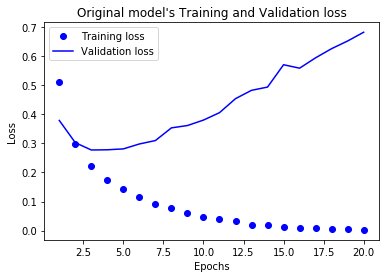

In [98]:
import matplotlib.pyplot as plt

acc = original_history.history['acc']
val_acc = original_history.history['val_acc']
loss = original_history.history['loss']
val_loss = original_history.history['val_loss']
epochs = range(1, len(acc)+1)

# 'bo'는 파랑 점을 의미
plt.plot(epochs, loss, 'bo', label = 'Training loss')
# 'b'는 파랑 실선을 의미
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Original model's Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() # 그래프 안에 표시

plt.show()
# training loss는 점점 줄지만 train되지 않은 데이터에 대한 loss는 증가하고 있다. 즉 오버피팅되어 train data 안에서만 잘 작동하는 상태

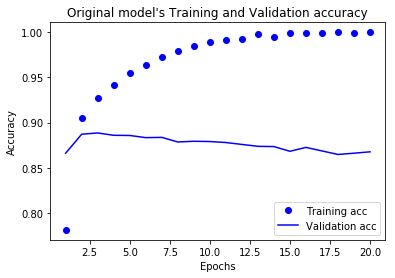

In [99]:
plt.clf() # 그래프 초기화

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Original model's Training and Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend() # 그래프 안에 표시|

plt.show()

In [100]:
# 오버피팅을 어느 정도 막기 위해 뉴런의 개수를 줄이고 재학습

smaller_network = models.Sequential()
smaller_network.add(layers.Dense(6, activation='relu', input_shape=(10000,))) # Dense : Dense는 Keras에서 fully-connected layer를 의미.
smaller_network.add(layers.Dense(6, activation='relu')) 
smaller_network.add(layers.Dense(1, activation='sigmoid')) # 0~1사이값이 나오도록 함. 

smaller_network.compile(optimizer=optimizers.RMSprop(lr = 0.001),
                loss = 'binary_crossentropy', # crossentropy는 확률분포를 서로 갖게 만든다는 개념. 
                metrics=['accuracy'])

smaller_history = network.fit(partial_x_train, partial_y_train, 
                    epochs = 20, 
                    batch_size = 512,
                    validation_data = (x_val, y_val)) # 리뷰 데이터를 512개씩 넣어서 학습


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
  512/15000 [>.............................] - ETA: 4s - loss: 0.0011 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 2s - loss: 0.0014 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 2s - loss: 0.0013 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 2s - loss: 0.0013 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0014 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0014 - acc: 1.0000

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.0014 - acc: 1.0000

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0015 - acc: 1.0000

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0016 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0021 - acc: 0.9999

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0042 - acc: 0.9996

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0040 - acc: 0.9996

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0039 - acc: 0.9996

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0038 - acc: 0.9996

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0037 - acc: 0.9996

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0036 - acc: 0.9996

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0035 - acc: 0.9996

14848/15000 [============================>.] - ETA: 0s - loss: 0.0034 - acc: 0.9997

15000/15000 [==============================] - 2s 155us/step - loss: 0.0034 - acc: 0.9997 - val_loss: 0.7155 - val_acc: 0.8660


Epoch 2/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0012 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 9.6450e-04 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 9.4097e-04 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0010 - acc: 1.0000    

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0011 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0012 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0012 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0012 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0014 - acc: 0.9999

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0014 - acc: 0.9999

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0013 - acc: 0.9999

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0013 - acc: 0.9999

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0013 - acc: 0.9999

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0013 - acc: 0.9999

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0012 - acc: 0.9999

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0012 - acc: 0.9999

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0012 - acc: 0.9999

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0012 - acc: 0.9999

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0012 - acc: 0.9999

15000/15000 [==============================] - 2s 146us/step - loss: 0.0012 - acc: 0.9999 - val_loss: 0.7535 - val_acc: 0.8633


Epoch 3/20
  512/15000 [>.............................] - ETA: 1s - loss: 7.2399e-04 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 6.2361e-04 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 6.7922e-04 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 7.0786e-04 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 1s - loss: 8.4433e-04 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 8.0887e-04 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 7.8201e-04 - acc: 1.0000

 6656/15000 [============>.................] - ETA: 0s - loss: 7.9463e-04 - acc: 1.0000

 7680/15000 [==============>...............] - ETA: 0s - loss: 7.9702e-04 - acc: 1.0000

 8704/15000 [================>.............] - ETA: 0s - loss: 7.9103e-04 - acc: 1.0000

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0024 - acc: 0.9995    

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0060 - acc: 0.9985

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0057 - acc: 0.9986

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0054 - acc: 0.9987

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0050 - acc: 0.9988

14848/15000 [============================>.]

 - ETA: 0s - loss: 0.0048 - acc: 0.9989

15000/15000 [==============================] - 2s 137us/step - loss: 0.0047 - acc: 0.9989 - val_loss: 0.7790 - val_acc: 0.8634


Epoch 4/20
  512/15000 [>.............................] - ETA: 1s - loss: 9.4862e-04 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 7.7686e-04 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 6.4953e-04 - acc: 1.0000

 3072/15000 [=====>........................]

 - ETA: 1s - loss: 6.0047e-04 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 0s - loss: 5.9360e-04 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 5.9683e-04 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 5.9548e-04 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 0s - loss: 6.1196e-04 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 6.0325e-04 - acc: 1.0000

 9216/15000 [=================>............] - ETA: 0s - loss: 5.9404e-04 - acc: 1.0000

10240/15000 [===================>..........] - ETA: 0s - loss: 5.8553e-04 - acc: 1.0000

11264/15000 [=====================>........] - ETA: 0s - loss: 5.8467e-04 - acc: 1.0000

12288/15000 [=======================>......] - ETA: 0s - loss: 5.8616e-04 - acc: 1.0000

13312/15000 [=========================>....] - ETA: 0s - loss: 5.8237e-04 - acc: 1.0000

14336/15000 [===========================>..] - ETA: 0s - loss: 6.4613e-04 - acc: 0.9999

15000/15000 [==============================] - 2s 130us/step - loss: 6.4361e-04 - acc: 0.9999 - val_loss: 0.7967 - val_acc: 0.8645


Epoch 5/20
  512/15000 [>.............................] - ETA: 1s - loss: 3.6987e-04 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 3.9933e-04 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 4.7204e-04 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 4.6301e-04 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 0s - loss: 6.2836e-04 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 5.8412e-04 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 5.5500e-04 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 0s - loss: 5.4335e-04 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 5.3194e-04 - acc: 1.0000

 9216/15000 [=================>............] - ETA: 0s - loss: 5.2120e-04 - acc: 1.0000

10240/15000 [===================>..........] - ETA: 0s - loss: 5.0904e-04 - acc: 1.0000

11264/15000 [=====================>........] - ETA: 0s - loss: 4.9877e-04 - acc: 1.0000

12288/15000 [=======================>......] - ETA: 0s - loss: 4.9126e-04 - acc: 1.0000

13312/15000 [=========================>....] - ETA: 0s - loss: 4.8043e-04 - acc: 1.0000

14336/15000 [===========================>..] - ETA: 0s - loss: 4.8998e-04 - acc: 1.0000

15000/15000 [==============================] - 2s 131us/step - loss: 4.9163e-04 - acc: 1.0000 - val_loss: 0.8328 - val_acc: 0.8636


Epoch 6/20
  512/15000 [>.............................] - ETA: 1s - loss: 2.6366e-04 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 4.6416e-04 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 3.6635e-04 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 3.4206e-04 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 0s - loss: 3.3376e-04 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 3.2376e-04 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 3.1620e-04 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 0s - loss: 3.1262e-04 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 3.2385e-04 - acc: 1.0000

 9216/15000 [=================>............] - ETA: 0s - loss: 4.5453e-04 - acc: 1.0000

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0036 - acc: 0.9988    

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0033 - acc: 0.9989

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0031 - acc: 0.9990

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0029 - acc: 0.9991

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0027 - acc: 0.9992

15000/15000 [==============================] - 2s 130us/step - loss: 0.0026 - acc: 0.9992 - val_loss: 0.8550 - val_acc: 0.8644


Epoch 7/20
  512/15000 [>.............................] - ETA: 1s - loss: 2.7838e-04 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 2.6896e-04 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 2.5302e-04 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 2.4540e-04 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 0s - loss: 2.3071e-04 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 2.5936e-04 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 2.5743e-04 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 0s - loss: 2.7239e-04 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 2.6908e-04 - acc: 1.0000

 9216/15000 [=================>............] - ETA: 0s - loss: 2.6229e-04 - acc: 1.0000

10240/15000 [===================>..........] - ETA: 0s - loss: 2.5898e-04 - acc: 1.0000

11264/15000 [=====================>........] - ETA: 0s - loss: 2.6002e-04 - acc: 1.0000

12288/15000 [=======================>......] - ETA: 0s - loss: 2.6129e-04 - acc: 1.0000

13312/15000 [=========================>....] - ETA: 0s - loss: 2.5641e-04 - acc: 1.0000

14336/15000 [===========================>..]

 - ETA: 0s - loss: 2.5884e-04 - acc: 1.0000

14848/15000 [============================>.] - ETA: 0s - loss: 2.5750e-04 - acc: 1.0000

15000/15000 [==============================] - 2s 134us/step - loss: 2.5643e-04 - acc: 1.0000 - val_loss: 0.8728 - val_acc: 0.8639


Epoch 8/20
  512/15000 [>.............................] - ETA: 1s - loss: 1.6582e-04 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 1.6890e-04 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 1.6700e-04 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 1s - loss: 1.8043e-04 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 0s - loss: 1.8055e-04 - acc: 1.0000

 5632/15000 [==========>...................] - ETA: 0s - loss: 1.8427e-04 - acc: 1.0000

 6656/15000 [============>.................] - ETA: 0s - loss: 2.0285e-04 - acc: 1.0000

 7680/15000 [==============>...............] - ETA: 0s - loss: 1.9949e-04 - acc: 1.0000

 8704/15000 [================>.............] - ETA: 0s - loss: 2.0055e-04 - acc: 1.0000

 9216/15000 [=================>............] - ETA: 0s - loss: 2.0200e-04 - acc: 1.0000

 9728/15000 [==================>...........] - ETA: 0s - loss: 2.0170e-04 - acc: 1.0000

10752/15000 [====================>.........] - ETA: 0s - loss: 1.9892e-04 - acc: 1.0000

11776/15000 [======================>.......] - ETA: 0s - loss: 1.9862e-04 - acc: 1.0000

12800/15000 [========================>.....] - ETA: 0s - loss: 2.0684e-04 - acc: 1.0000

13824/15000 [==========================>...] - ETA: 0s - loss: 2.0737e-04 - acc: 1.0000

14848/15000 [============================>.] - ETA: 0s - loss: 2.0827e-04 - acc: 1.0000

15000/15000 [==============================] - 2s 135us/step - loss: 2.0781e-04 - acc: 1.0000 - val_loss: 0.8999 - val_acc: 0.8637


Epoch 9/20
  512/15000 [>.............................] - ETA: 1s - loss: 1.1330e-04 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 1.1885e-04 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 1.2683e-04 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 1.4668e-04 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 0s - loss: 1.4039e-04 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 1.3665e-04 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 1.3358e-04 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 0s - loss: 1.3044e-04 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 1.3632e-04 - acc: 1.0000

 9216/15000 [=================>............] - ETA: 0s - loss: 3.7605e-04 - acc: 0.9999

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0031 - acc: 0.9988    

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0029 - acc: 0.9989

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0027 - acc: 0.9990

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0025 - acc: 0.9991

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0023 - acc: 0.9991

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0023 - acc: 0.9992

15000/15000 [==============================] - 2s 137us/step - loss: 0.0022 - acc: 0.9992 - val_loss: 0.9258 - val_acc: 0.8650


Epoch 10/20
  512/15000 [>.............................] - ETA: 1s - loss: 1.1189e-04 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 1.1991e-04 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 1.0765e-04 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 1.1320e-04 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 1s - loss: 1.1188e-04 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 0s - loss: 1.0985e-04 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 1.0918e-04 - acc: 1.0000

 5632/15000 [==========>...................] - ETA: 0s - loss: 1.0820e-04 - acc: 1.0000

 6656/15000 [============>.................] - ETA: 0s - loss: 1.0967e-04 - acc: 1.0000

 7680/15000 [==============>...............] - ETA: 0s - loss: 1.0774e-04 - acc: 1.0000

 8704/15000 [================>.............] - ETA: 0s - loss: 1.1004e-04 - acc: 1.0000

 9216/15000 [=================>............] - ETA: 0s - loss: 1.0984e-04 - acc: 1.0000

10240/15000 [===================>..........] - ETA: 0s - loss: 1.1652e-04 - acc: 1.0000

11264/15000 [=====================>........] - ETA: 0s - loss: 1.1691e-04 - acc: 1.0000

12288/15000 [=======================>......] - ETA: 0s - loss: 1.1699e-04 - acc: 1.0000

13312/15000 [=========================>....] - ETA: 0s - loss: 1.2505e-04 - acc: 1.0000

13824/15000 [==========================>...] - ETA: 0s - loss: 1.2524e-04 - acc: 1.0000

14336/15000 [===========================>..] - ETA: 0s - loss: 1.2526e-04 - acc: 1.0000

15000/15000 [==============================] - 2s 140us/step - loss: 1.2558e-04 - acc: 1.0000 - val_loss: 0.9368 - val_acc: 0.8640


Epoch 11/20
  512/15000 [>.............................] - ETA: 1s - loss: 2.3491e-04 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 1.6230e-04 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 1.3553e-04 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 1.2568e-04 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 1s - loss: 1.1762e-04 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 1s - loss: 1.1624e-04 - acc: 1.0000

 5632/15000 [==========>...................] - ETA: 0s - loss: 1.1816e-04 - acc: 1.0000

 6656/15000 [============>.................] - ETA: 0s - loss: 1.1361e-04 - acc: 1.0000

 7680/15000 [==============>...............] - ETA: 0s - loss: 1.1021e-04 - acc: 1.0000

 8704/15000 [================>.............] - ETA: 0s - loss: 1.1037e-04 - acc: 1.0000

 9728/15000 [==================>...........] - ETA: 0s - loss: 1.1016e-04 - acc: 1.0000

10752/15000 [====================>.........] - ETA: 0s - loss: 1.0923e-04 - acc: 1.0000

11776/15000 [======================>.......] - ETA: 0s - loss: 1.0846e-04 - acc: 1.0000

12800/15000 [========================>.....] - ETA: 0s - loss: 1.0577e-04 - acc: 1.0000

13824/15000 [==========================>...] - ETA: 0s - loss: 1.0494e-04 - acc: 1.0000

14848/15000 [============================>.] - ETA: 0s - loss: 1.0424e-04 - acc: 1.0000

15000/15000 [==============================] - 2s 134us/step - loss: 1.0380e-04 - acc: 1.0000 - val_loss: 0.9531 - val_acc: 0.8643


Epoch 12/20
  512/15000 [>.............................] - ETA: 1s - loss: 7.1299e-05 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 6.5651e-05 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 1.1003e-04 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 9.5864e-05 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 0s - loss: 8.5423e-05 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 8.5593e-05 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 7.9872e-05 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 0s - loss: 7.7896e-05 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 7.9492e-05 - acc: 1.0000

 9216/15000 [=================>............] - ETA: 0s - loss: 8.2902e-05 - acc: 1.0000

10240/15000 [===================>..........] - ETA: 0s - loss: 8.1719e-05 - acc: 1.0000

11264/15000 [=====================>........] - ETA: 0s - loss: 8.3070e-05 - acc: 1.0000

11776/15000 [======================>.......] - ETA: 0s - loss: 8.3133e-05 - acc: 1.0000

12800/15000 [========================>.....] - ETA: 0s - loss: 8.2046e-05 - acc: 1.0000

13824/15000 [==========================>...] - ETA: 0s - loss: 8.1068e-05 - acc: 1.0000

14336/15000 [===========================>..] - ETA: 0s - loss: 8.2102e-05 - acc: 1.0000

14848/15000 [============================>.] - ETA: 0s - loss: 8.1978e-05 - acc: 1.0000

15000/15000 [==============================] - 2s 137us/step - loss: 8.1694e-05 - acc: 1.0000 - val_loss: 0.9900 - val_acc: 0.8639


Epoch 13/20
  512/15000 [>.............................] - ETA: 1s - loss: 6.2771e-05 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 5.3925e-05 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 4.9232e-05 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 4.9954e-05 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 0s - loss: 4.7269e-05 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 4.9690e-05 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 4.7655e-05 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 0s - loss: 4.7450e-05 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 7.0928e-05 - acc: 1.0000

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0031 - acc: 0.9987    

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0028 - acc: 0.9988

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0026 - acc: 0.9989

12288/15000 [=======================>......]

 - ETA: 0s - loss: 0.0023 - acc: 0.9990

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0023 - acc: 0.9991

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0021 - acc: 0.9991

14848/15000 [============================>.] - ETA: 0s - loss: 0.0020 - acc: 0.9992

15000/15000 [==============================] - 2s 132us/step - loss: 0.0019 - acc: 0.9992 - val_loss: 1.0157 - val_acc: 0.8620


Epoch 14/20
  512/15000 [>.............................] - ETA: 1s - loss: 5.1738e-05 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 4.7084e-05 - acc: 1.0000

 2048/15000 [===>..........................]

 - ETA: 1s - loss: 3.8922e-05 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 3.7077e-05 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 0s - loss: 3.7119e-05 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 4.2562e-05 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 4.2350e-05 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 0s - loss: 4.5806e-05 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 4.6207e-05 - acc: 1.0000

 9216/15000 [=================>............] - ETA: 0s - loss: 4.5450e-05 - acc: 1.0000

10240/15000 [===================>..........] - ETA: 0s - loss: 4.3951e-05 - acc: 1.0000

11264/15000 [=====================>........] - ETA: 0s - loss: 4.2857e-05 - acc: 1.0000

12288/15000 [=======================>......] - ETA: 0s - loss: 4.2214e-05 - acc: 1.0000

13312/15000 [=========================>....] - ETA: 0s - loss: 4.3667e-05 - acc: 1.0000

14336/15000 [===========================>..] - ETA: 0s - loss: 4.3836e-05 - acc: 1.0000

15000/15000 [==============================] - 2s 131us/step - loss: 4.3511e-05 - acc: 1.0000 - val_loss: 1.0237 - val_acc: 0.8624


Epoch 15/20
  512/15000 [>.............................] - ETA: 1s - loss: 5.6879e-05 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 4.8216e-05 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 4.3459e-05 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 1s - loss: 5.0204e-05 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 0s - loss: 4.5649e-05 - acc: 1.0000

 5632/15000 [==========>...................] - ETA: 0s - loss: 4.4089e-05 - acc: 1.0000

 6656/15000 [============>.................] - ETA: 0s - loss: 4.2691e-05 - acc: 1.0000

 7680/15000 [==============>...............] - ETA: 0s - loss: 4.1676e-05 - acc: 1.0000

 8704/15000 [================>.............] - ETA: 0s - loss: 3.9862e-05 - acc: 1.0000

 9728/15000 [==================>...........]

 - ETA: 0s - loss: 3.9261e-05 - acc: 1.0000

10752/15000 [====================>.........] - ETA: 0s - loss: 3.9151e-05 - acc: 1.0000

11776/15000 [======================>.......] - ETA: 0s - loss: 3.8283e-05 - acc: 1.0000

12800/15000 [========================>.....] - ETA: 0s - loss: 3.7529e-05 - acc: 1.0000

13824/15000 [==========================>...] - ETA: 0s - loss: 3.7120e-05 - acc: 1.0000

14848/15000 [============================>.] - ETA: 0s - loss: 3.6396e-05 - acc: 1.0000

15000/15000 [==============================] - 2s 131us/step - loss: 3.6225e-05 - acc: 1.0000 - val_loss: 1.0357 - val_acc: 0.8623


Epoch 16/20
  512/15000 [>.............................] - ETA: 1s - loss: 2.1026e-05 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 2.0766e-05 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 2.3015e-05 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 2.3001e-05 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 0s - loss: 2.4082e-05 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 2.4523e-05 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 2.3911e-05 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 0s - loss: 2.4007e-05 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 2.3757e-05 - acc: 1.0000

 9216/15000 [=================>............] - ETA: 0s - loss: 2.6181e-05 - acc: 1.0000

10240/15000 [===================>..........] - ETA: 0s - loss: 2.6559e-05 - acc: 1.0000

11264/15000 [=====================>........] - ETA: 0s - loss: 2.6842e-05 - acc: 1.0000

12288/15000 [=======================>......] - ETA: 0s - loss: 3.0658e-05 - acc: 1.0000

13312/15000 [=========================>....] - ETA: 0s - loss: 3.0287e-05 - acc: 1.0000

14336/15000 [===========================>..] - ETA: 0s - loss: 2.9857e-05 - acc: 1.0000

15000/15000 [==============================] - 2s 132us/step - loss: 2.9724e-05 - acc: 1.0000 - val_loss: 1.0570 - val_acc: 0.8625


Epoch 17/20
  512/15000 [>.............................] - ETA: 1s - loss: 2.0710e-05 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 1.6181e-05 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 1.5489e-05 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 1.5661e-05 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 0s - loss: 1.8579e-05 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 1.8718e-05 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 1.9086e-05 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 0s - loss: 1.9047e-05 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 2.1752e-05 - acc: 1.0000

 9216/15000 [=================>............] - ETA: 0s - loss: 2.2356e-05 - acc: 1.0000

10240/15000 [===================>..........] - ETA: 0s - loss: 2.2274e-05 - acc: 1.0000

11264/15000 [=====================>........] - ETA: 0s - loss: 2.3344e-05 - acc: 1.0000

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0031 - acc: 0.9989    

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0033 - acc: 0.9987

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0030 - acc: 0.9988

15000/15000 [==============================] - 2s 131us/step - loss: 0.0029 - acc: 0.9989 - val_loss: 1.0712 - val_acc: 0.8630


Epoch 18/20
  512/15000 [>.............................] - ETA: 1s - loss: 3.0217e-05 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 2.6366e-05 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 2.8971e-05 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 2.4101e-05 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 0s - loss: 2.1707e-05 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 2.1156e-05 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 2.0555e-05 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 0s - loss: 1.9610e-05 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 1.9231e-05 - acc: 1.0000

 8704/15000 [================>.............] - ETA: 0s - loss: 1.9156e-05 - acc: 1.0000

 9728/15000 [==================>...........] - ETA: 0s - loss: 1.9422e-05 - acc: 1.0000

10752/15000 [====================>.........] - ETA: 0s - loss: 1.9267e-05 - acc: 1.0000

11776/15000 [======================>.......] - ETA: 0s - loss: 1.9242e-05 - acc: 1.0000

12800/15000 [========================>.....] - ETA: 0s - loss: 1.8942e-05 - acc: 1.0000

13824/15000 [==========================>...] - ETA: 0s - loss: 1.9042e-05 - acc: 1.0000

14848/15000 [============================>.] - ETA: 0s - loss: 1.8716e-05 - acc: 1.0000

15000/15000 [==============================] - 2s 132us/step - loss: 1.8671e-05 - acc: 1.0000 - val_loss: 1.0791 - val_acc: 0.8625


Epoch 19/20
  512/15000 [>.............................] - ETA: 1s - loss: 1.3845e-05 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 1.6540e-05 - acc: 1.0000

 2048/15000 [===>..........................]

 - ETA: 1s - loss: 1.3427e-05 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 1.3771e-05 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 0s - loss: 1.7482e-05 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 1.6485e-05 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 1.6418e-05 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 0s - loss: 1.6934e-05 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 1.6237e-05 - acc: 1.0000

 9216/15000 [=================>............] - ETA: 0s - loss: 1.6417e-05 - acc: 1.0000

10240/15000 [===================>..........] - ETA: 0s - loss: 1.6267e-05 - acc: 1.0000

11264/15000 [=====================>........] - ETA: 0s - loss: 1.6139e-05 - acc: 1.0000

12288/15000 [=======================>......] - ETA: 0s - loss: 1.5869e-05 - acc: 1.0000

13312/15000 [=========================>....] - ETA: 0s - loss: 1.5452e-05 - acc: 1.0000

14336/15000 [===========================>..] - ETA: 0s - loss: 1.5772e-05 - acc: 1.0000

15000/15000 [==============================] - 2s 131us/step - loss: 1.5747e-05 - acc: 1.0000 - val_loss: 1.0896 - val_acc: 0.8625


Epoch 20/20
  512/15000 [>.............................] - ETA: 1s - loss: 1.5690e-05 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 1.2620e-05 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 1.1253e-05 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 1.1225e-05 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 0s - loss: 1.1200e-05 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 0s - loss: 1.1177e-05 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 1.0978e-05 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 0s - loss: 1.3442e-05 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 1.4212e-05 - acc: 1.0000

 9216/15000 [=================>............] - ETA: 0s - loss: 1.4106e-05 - acc: 1.0000

10240/15000 [===================>..........] - ETA: 0s - loss: 1.3726e-05 - acc: 1.0000

11264/15000 [=====================>........] - ETA: 0s - loss: 1.3418e-05 - acc: 1.0000

12288/15000 [=======================>......] - ETA: 0s - loss: 1.3574e-05 - acc: 1.0000

13312/15000 [=========================>....] - ETA: 0s - loss: 1.3596e-05 - acc: 1.0000

14336/15000 [===========================>..] - ETA: 0s - loss: 1.3560e-05 - acc: 1.0000

15000/15000 [==============================] - 2s 132us/step - loss: 1.3494e-05 - acc: 1.0000 - val_loss: 1.1024 - val_acc: 0.8622


In [101]:
smaller_history_dict = smaller_history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

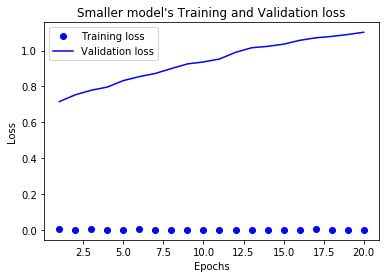

In [102]:
acc = smaller_history.history['acc']
val_acc = smaller_history.history['val_acc']
loss = smaller_history.history['loss']
val_loss = smaller_history.history['val_loss']
epochs = range(1, len(acc)+1)

# 'bo'는 파랑 점을 의미
plt.plot(epochs, loss, 'bo', label = 'Training loss')
# 'b'는 파랑 실선을 의미
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Smaller model's Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() # 그래프 안에 표시|

plt.show()

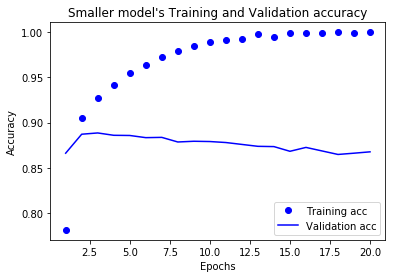

In [103]:
plt.clf() # 그래프 초기화

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Smaller model's Training and Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend() # 그래프 안에 표시|

plt.show()